In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('mnist_train.csv')
print(df.shape)
df.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [11]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


We'll separate 'label' column(into Y) and 'pixels' column(into X)
for this,we need to convert it
from 'Pandas DF' -> 'Numpy Array'

In [12]:
data=df.values

In [13]:
print(type(data))

<class 'numpy.ndarray'>


In [14]:
X=data[:,1:]
Y=data[:,0]

Splitting data.
80% ->train,rest ->test

In [17]:
split=int(0.8*X.shape[0])

In [18]:
split

48000

In [19]:
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

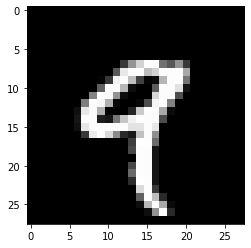

In [22]:
#Visualising sample images
def drawImg(sample):
    #reshaping 784 -> 28x28 pixel
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X_train[4])
    

In [35]:
print(Y_train[4])

9


confirming, label matches -> works perfect

In [41]:
##KNN Algo

#function to calc Eucledian distance b/w two vectors
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

#here k=5,means the number of neighbors we're considering
def knn(X,Y,queryPoint,k=5):
    
    #vals stores distances b/w 2 points
    vals=[]
    
    #total number of points to iterate over
    m=X.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,X[i]) #dist b/w our considered point and the ith point
        vals.append((d,Y[i])) #dist,label| dist first bcoz we'd sort for d
        
    vals=sorted(vals)
        #Nearest/First K points
    vals=vals[:k] #till k(5)
        
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True) #return (lables,freq of occurence)
    index=new_vals[1].argmax()   #index of max occuring label
    pred=new_vals[0][index]  #value of that label extracted from its index
    return pred

In [42]:
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))

4


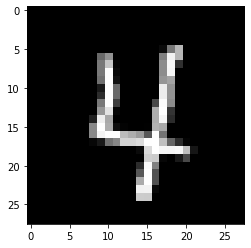

In [43]:
drawImg(X_test[0])